In [1]:
import tensorflow
import joblib

In [2]:
tensorflow.__version__


'2.5.0'

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#import tensoflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout



In [4]:
#load the data

!ls

drive  sample_data


In [5]:
ls

drive/  sample_data/


In [6]:
cd drive

/content/drive


In [10]:
cd MyDrive

[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive


In [11]:
df=pd.read_csv('Churn_Modelling.csv')

In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
X=df.iloc[: ,3:13]
y=df.iloc[: ,13]


In [14]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
X=pd.concat([X,geography,gender],axis=1)


In [16]:
X=X.drop(columns=['Geography','Gender'],axis=1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [19]:
#feature scaling for scaling of data


In [20]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
#model architecture
#model compilation
#training model or model fit

SyntaxError: ignored

In [22]:
#creation of model
model=Sequential(
    [
     Dense(100,activation='sigmoid'),  #hidden layer1
     Dense(50,activation='relu',kernel_initializer='he_uniform'),  #hidden layer2
     Dense(25,activation='sigmoid'),  #hidden layer3
     Dense(1,activation='sigmoid')  #output layer
    ]
)

In [23]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#model training
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 4s 3ms/step - loss: 0.5352 - accuracy: 0.7675 - val_loss: 0.4934 - val_accuracy: 0.8037
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7969 - val_loss: 0.4924 - val_accuracy: 0.8037
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.7969 - val_loss: 0.4911 - val_accuracy: 0.8037
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.7969 - val_loss: 0.4897 - val_accuracy: 0.8037
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7969 - val_loss: 0.4891 - val_accuracy: 0.8037
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7969 - val_loss: 0.4868 - val_accuracy: 0.8037
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7969 - val_loss: 0.4852 - val_accuracy: 0.8037
Epoch 

NO of hidden layers
optimizer
epochs
batch size
loss
activation
units

Text(0, 0.5, 'accuracy')

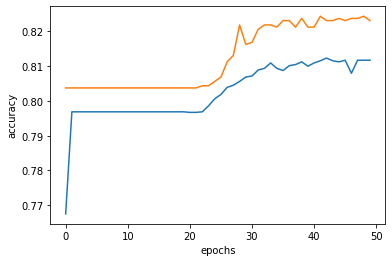

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='value')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [26]:
y_pred=model.predict(X_test)
y_pred
y_pred_prob=y_pred>=0.7
y_pred_prob

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [28]:
confusion_matrix(y_pred_prob,y_test)

array([[1576,  420],
       [   1,    3]])

In [29]:
accuracy_score(y_pred_prob,y_test)

0.7895

In [30]:
model.save('chrun_model.h5')
joblib.dump(sc , 'feature_scaling_model.pkl')


['feature_scaling_model.pkl']

In [31]:
ls


 1597649586415286675342481945175.jpg
 15976496599228524200881062194187.jpg
 15976497400927063895625924611213.jpg
 15976497969077517774053707261476.jpg
 15976498469777107776290978227381.jpg
 15976498919421332716230429578789.jpg
 20201009_235137.jpg
 20201023_100032.jpg
 20201023_100044.jpg
 20201023_115843.jpg
 20201027_095634.jpg
 20201027_095657.jpg
 20201027_095811.jpg
 20201027_101115.jpg
 20201027_101207.jpg
 20201027_101211.jpg
 20201027_101230.jpg
 20210309_020012.jpg
'247588_Kushagra_Bahl_FeeReceipt_ExportToPDF (1).pdf'
 247588_Kushagra_Bahl_FeeReceipt_ExportToPDF.pdf
'An Adventure of Don Quixote (1).docx'
'An Adventure of Don Quixote.docx'
'Any no x Teens, Teens x Teens & Any no x 11.gdoc'
'Any no x Teens, Teens x Teens & Any no x 11.pdf'
'CamScanner 09-26-2020 15.23.28.gdoc'
 chrun_model.h5
 Churn_Modelling.csv
 Classroom/
'Class V Activity Sheet (1).gdoc'
'Class V Activity Sheet (2).gdoc'
'Class V Activity Sheet (3).gdoc'
'Class V Activity Sheet (4).gdoc'
'Class V Activity Sh

In [34]:
from tensorflow.keras.models import load_model
loaded_model=load_model('chrun_model.h5')

In [35]:
sc  = joblib.load('feature_scaling_model.pkl')
data = sc.transform([[5,2,1,100,1,1,1,8,1,1,9]])
a = loaded_model.predict(data)
a[0] > 0.7

array([False])

In [36]:
a = (a[0] > 0.7)[0]

In [38]:
if a == False:
  print('he will not leave')
else:
  print('he will lrave')

he will not leave


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 7,551
Trainable params: 7,551
Non-trainable params: 0
_________________________________________________________________
